# WeRate Dog Project

### Author: Qi Meng

#### Last modified date: 2018-03-21


## Introduction

WeRateDogs is a famous twitter account that rate dogs and create humorous comments. Given tweet data from local, url and API query, this project will help to wrangle and analyze WeRateDaogs tweets.

## Gathering Data

In [555]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  1. Read Data from local drive

In [682]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [683]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


###  2.Download Data from Udacity server

In [ ]:
import os
import requests

# create folder
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [685]:
tweet_image = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

In [559]:
tweet_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3.Query data from twitter API, and store JSON data in local file

#### 3.1. Create API connection

In [ ]:

#Importing libraries
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time


# authentication pieces
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [ ]:
#Twitter Query using tweet_id information from the df.

tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Retrieve Error for tweet_id: " + str(tweet))

#### 3.2. Query data to dataset 

In [ ]:
tweet_ids = list(tweet_archive.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        exit(0)

#### 3.3. Save JSON to text file

In [ ]:
import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [686]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')

## Assessing the Data

In [687]:
pd.set_option('display.max_colwidth', -1)

In [688]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [689]:
tweet_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [690]:
tweet_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [691]:
tweet_archive.name.value_counts().head()

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Name: name, dtype: int64

In [692]:
tweet_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [693]:
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [694]:
tweet_df.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [695]:
tweet_df.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'sizes': {'large': {'h': 720, 'resize': 'fit', 'w': 960}, 'medium': {'h': 720, 'resize': 'fit', 'w': 960}, 'small': {'h': 510, 'resize': 'fit', 'w': 680}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'type': 'photo', 'url': 'https://t.co/BLDqew2Ijj'}], 'symbols': [], 'urls': [], 'user_mentions': []}","{'media': [{'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'sizes': {'large': {'h': 720, 'resize': 'fit', 'w': 960}, 'medium': {'h': 720, 'resize': 'fit', 'w': 960}, 'small': {'h': 510, 'resize': 'fit', 'w': 680}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'type': 'photo', 'url': 'https://t.co/BLDqew2Ijj'}]}",2524,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,518,0,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,0,"{'contributors_enabled': False, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'default_profile': False, 'default_profile_image': False, 'description': 'Your Only Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'entities': {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'weratedogs.com', 'expanded_url': 'http://weratedogs.com', 'indices': [0, 23], 'url': 'https://t.co/N7sNNHAEXS'}]}}, 'favourites_count': 132052, 'follow_request_sent': False, 'followers_count': 5874308, 'following': False, 'friends_count': 103, 'geo_enabled': True, 'has_extended_profile': True, 'id': 4196983835, 'id_str': '4196983835', 'is_translation_enabled': False, 'is_translator': False, 'lang': 'en', 'listed_count': 4084, 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'name': 'WeRateDogs™', 'notifications': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1515037507', 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'protected': False, 'screen_name': 'dog_rates', 'statuses_count': 6699, 'time_zone': None, 'translator_type': 'none', 'url': 'https://t.co/N7sNNHAEXS', 'utc_offset': None, 'verified': True}"
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pic.twitter.com/r7mOb2m0UI', 'expanded_url': 'https://twitter.com/dog_rates/status/666029285002620928/photo/1', 'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url

In [696]:
tweet_df.shape

(2346, 30)

In [697]:
# Clean tweet_df, keep only useful columns

tweet_df = tweet_df.reset_index()[['created_at','id','favorite_count','favorited','retweet_count','retweeted','retweeted_status','text']]

In [698]:
tweet_df.head(2)

,created_at,id,favorite_count,favorited,retweet_count,retweeted,retweeted_status,text
0,2015-11-15 22:32:08,666020888022790144,2524,0,518,0,NaN,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
1,2015-11-15 23:05:30,666029285002620928,131,0,48,0,NaN,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI


### Quality 

#### tweet_archive:
 - tweet_id should be string not int
 - incorrect rating for numerator with decimal points
 - incorrect ratings, some have rating_denominator < 10 
 - Missing Dog names
 - Incorrect Dog names, name is 'an', 'the'.
 - Need to exclude retweets
 - Timestamp should be a datetime object

 
 
#### tweet_image:
 - tweet_id should be string not int
 - p1, p2, p3 dog type names is inconsistant, need to remove under score, make all lower cases
 - missing records
 - duplicate image urls, same images used multiple times
 
#### tweet_df:
 - tweet_id should be string not int
 - Need to exclude retweets
 - created time is not datetime type
 - missing records

 
 

### Tideness

#### tweet_archive:
 - Urls should be separated from text
 - Rating_numerator, and rating_denominator should be float data types rather than int
 - Multiple dog names in the table, doggo, floofer,	pupper, puppo should all be combined into one stage column
 - Tweet_id should be string type
 
#### tweet_image:
 - 6 variables to represent predictions, should be summarized into two columns, prediction and confidence
 - Not all tweet ids in the archive table have images


#### tweet_df:
 - column id needs to be changed to 'tweet_id'
 - Duplicate ids in the dataframe, id and ids, both of them need to be converted to one tweet_id column
 - Data index need to be reset to tweet_id
 - tweet_df should be part of tweet_archive table

 
 
 


## Cleaning

In [699]:
# Create copies of original dataframes

tweet_archive_clean = tweet_archive.copy()
tweet_image_clean = tweet_image.copy()
tweet_df_clean = tweet_df.copy()


###  Tweet_archive



#### Define
The data type of tweet_id should be string not int

#### Code

In [700]:
tweet_archive_clean.dtypes

tweet_id                      int64  
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
dtype: object

In [703]:
tweet_archive_clean.tweet_id  = tweet_archive_clean.tweet_id.astype(str)

### test

In [704]:
tweet_archive_clean.tweet_id.dtypes

dtype('O')

#### Define
The WeRate dog tweets contains retweets, which will be irrelevant in this analysis


#### Code

In [705]:
tweet_archive.shape

(2356, 17)

In [706]:
tweet_archive_clean =tweet_archive_clean[tweet_archive_clean['retweeted_status_user_id'].isnull() == True]

#### Test

In [707]:
tweet_archive_clean.shape
# 181 retweet removed


(2175, 17)

In [708]:
tweet_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [709]:
# Remove redundant columns

tweet_archive_clean = tweet_archive_clean[['tweet_id', 'timestamp',
       'text', 'rating_numerator', 'rating_denominator', 
                                           'name', 'doggo', 'floofer', 'pupper', 'puppo']]

In [710]:
tweet_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None


#### Define
Incorrect rating for numerator has decimal point

In [712]:
tweet_archive_clean.loc[tweet_archive_clean['tweet_id'] == '681340665377193984',['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10


#### Code

In [714]:
def find_dot(x):
    if '.' in str(x):
        return True
    else:
        return False

In [715]:
tweet_archive_clean['new'] = tweet_archive_clean.text.str.extract('(?P<new>(\d+).(\d+)+/\d+)', expand=False)['new']

In [716]:
tweet_archive_clean.loc[tweet_archive_clean['new'].apply(find_dot) == True]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new
45,883482846933004288,2017-07-08 00:28:19 +0000,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella,None,None,None,None,13.5/10
695,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,Logan,None,None,None,None,9.75/10
763,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,Sophie,None,None,pupper,None,11.27/10
1689,681340665377193984,2015-12-28 05:07:27 +0000,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10,None,None,None,None,None,9.5/10
1712,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,None,None,None,None,None,11.26/10


In [717]:
tweet_archive_clean['new'].unique()

array([nan, '13.5/10', '420/10', '666/10', '182/10', '960/00', '11/15/15',
       '007/10', '9.75/10', '11.27/10', '165/150', '1776/10', '3 13/10',
       '204/170', '143/130', '121/110', '9.5/10', '11.26/10', '144/120',
       '3 1/2'], dtype=object)

In [718]:
new_df = pd.DataFrame(tweet_archive_clean.loc[tweet_archive_clean['new'].apply(find_dot) == True].new.str.split('/').tolist(), columns=['rating_numerator', 'rating_denominator'])

In [719]:
tweet_archive_clean.loc[tweet_archive_clean['new'].apply(find_dot) == True,'rating_numerator'] = new_df['rating_numerator'].tolist()
tweet_archive_clean.loc[tweet_archive_clean['new'].apply(find_dot) == True,'rating_denominator'] = new_df['rating_denominator'].tolist()

#### Test

In [720]:
tweet_archive_clean.loc[tweet_archive_clean['new'].apply(find_dot) == True]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new
45,883482846933004288,2017-07-08 00:28:19 +0000,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10,Bella,None,None,None,None,13.5/10
695,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10,Logan,None,None,None,None,9.75/10
763,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10,Sophie,None,None,pupper,None,11.27/10
1689,681340665377193984,2015-12-28 05:07:27 +0000,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5,10,None,None,None,None,None,9.5/10
1712,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10,None,None,None,None,None,11.26/10


In [721]:
# Drop new column
tweet_archive_clean.drop(['new'], axis= 1, inplace= True)

#### Define

Tweet_archive data has rows do not have names for the dogs.

In [722]:
tweet_archive.name.value_counts().head(5)

# None and a are not dog names 

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Name: name, dtype: int64

#### Code

In [723]:
## Keep only rows that have names not equal to 'a' and 'None'
tweet_archive_clean = tweet_archive_clean[(tweet_archive_clean['name'] != 'a')]

#### Test

In [724]:
tweet_archive_clean.name.value_counts().head()

None       680
Lucy       11 
Charlie    11 
Oliver     10 
Cooper     10 
Name: name, dtype: int64

#### Define

Change tweet_archive timestampe from object type to datetime type.

#### Code

In [725]:
tweet_archive_clean['timestamp'] = pd.to_datetime(tweet_archive_clean['timestamp'])

#### Test

In [726]:
tweet_archive_clean.dtypes

tweet_id              object        
timestamp             datetime64[ns]
text                  object        
rating_numerator      object        
rating_denominator    object        
name                  object        
doggo                 object        
floofer               object        
pupper                object        
puppo                 object        
dtype: object

#### Define

Combine doggo, flooer, puper, puppo columns into stage column in tweet_clean_archive, and remove redundant columns 

In [727]:
tweet_archive_clean[['doggo', 'floofer','pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


#### Code

In [728]:
# Combine columns into one stage column
tweet_archive_clean['stage'] = tweet_archive_clean[['doggo', 'floofer','pupper', 'puppo']].apply(lambda x:''.join(x), axis= 1)

In [729]:
tweet_archive_clean.stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [730]:
tweet_archive_clean.stage = tweet_archive_clean.stage.apply(lambda x:x.replace('None',''))
tweet_archive_clean.stage = tweet_archive_clean.stage.apply(lambda x:x.replace('doggopuppo','doggo'))
tweet_archive_clean.stage = tweet_archive_clean.stage.apply(lambda x:x.replace('doggofloofer','doggo'))
tweet_archive_clean.stage = tweet_archive_clean.stage.apply(lambda x:x.replace('doggopupper','doggo'))


tweet_archive_clean.drop(['doggo', 'floofer','pupper', 'puppo'],  axis=1, inplace=True)

In [731]:
tweet_archive_clean.stage.value_counts()

           1780
pupper     220 
doggo      87  
puppo      24  
floofer    9   
Name: stage, dtype: int64

#### Test

In [732]:
tweet_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,


#### Define

Correct names in the tweet_archive_clean table

In [733]:
tweet_archive_clean.name.head()

0    Phineas 
1    Tilly   
2    Archie  
3    Darla   
4    Franklin
Name: name, dtype: object

#### Code

In [734]:
wrong_name_list = ['an', 'the', 'officially','quite']

In [735]:
tweet_archive_clean.name = tweet_archive_clean.name.apply(lambda x: 'None' if x in wrong_name_list else x)

#### Test

In [736]:
tweet_archive_clean[tweet_archive_clean['name']=='the']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage


#### Define
Separate text in tweet_archive_clean into text and url column

In [737]:
tweet_archive_clean.text.head(2)

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
Name: text, dtype: object

#### Code

In [738]:
# Extract url from text column
tweet_archive_clean['url'] = tweet_archive_clean.text.str.extract('(?P<url>https://.*/+[a-zA-Z0-9]+)', expand=True)

In [739]:
tweet_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,,https://t.co/AtUZn91f7f


In [740]:
# Keep only text in the text column

tweet_archive_clean['text'] = tweet_archive_clean['text'].apply(lambda x: x.split('https')[0])

In [741]:
tweet_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,,https://t.co/0Xxu71qeIV


#### Define
Rating numerator and denorminator should be float types.

#### Code

In [742]:
tweet_archive_clean.rating_numerator = tweet_archive_clean.rating_numerator.astype(float)
tweet_archive_clean.rating_denominator = tweet_archive_clean.rating_denominator.astype(float)


#### Test

In [743]:
tweet_archive_clean.dtypes

tweet_id              object        
timestamp             datetime64[ns]
text                  object        
rating_numerator      float64       
rating_denominator    float64       
name                  object        
stage                 object        
url                   object        
dtype: object

#### Define
tweet_arcive table have incorrect ratings


In [744]:
tweet_archive_clean.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10                                                      
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10                  
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us                                                            
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Name: text, dtype: object

In [745]:
tweet_archive_clean['rating_denominator'].value_counts()

10.0     2099
11.0     2   
20.0     2   
50.0     2   
80.0     2   
110.0    1   
0.0      1   
15.0     1   
7.0      1   
150.0    1   
16.0     1   
120.0    1   
2.0      1   
170.0    1   
70.0     1   
130.0    1   
90.0     1   
40.0     1   
Name: rating_denominator, dtype: int64

In [746]:
tweet_archive_clean.dtypes

tweet_id              object        
timestamp             datetime64[ns]
text                  object        
rating_numerator      float64       
rating_denominator    float64       
name                  object        
stage                 object        
url                   object        
dtype: object

In [751]:
tweet_archive_clean[tweet_archive_clean['rating_denominator'] < 10]


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,url


In [752]:
tweet_archive_clean.loc[516]

tweet_id              810984652412424192                                                                                                        
timestamp             2016-12-19 23:06:23                                                                                                       
text                  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n
rating_numerator      0                                                                                                                         
rating_denominator    10                                                                                                                        
name                  Sam                                                                                                                       
stage                                                                                                                             

#### Code

In [749]:
tweet_archive_clean.loc[313,['rating_numerator','rating_denominator']] = (13, 10)
tweet_archive_clean.loc[516,['rating_numerator','rating_denominator']] = (0, 10)
tweet_archive_clean.loc[2335,['rating_numerator','rating_denominator']] = (9, 10)



#### Test

In [750]:
tweet_archive_clean[tweet_archive_clean['rating_denominator'] < 10]


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,url


### Tweet_df

#### Define

Remove retweet from tweet_df table

In [753]:
# rename id tp tweet_id
tweet_df_clean = tweet_df.rename(columns={'id':'tweet_id'})

In [754]:
tweet_df_clean.head(2)

,created_at,tweet_id,favorite_count,favorited,retweet_count,retweeted,retweeted_status,text
0,2015-11-15 22:32:08,666020888022790144,2524,0,518,0,NaN,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
1,2015-11-15 23:05:30,666029285002620928,131,0,48,0,NaN,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI


#### Code

In [755]:
tweet_df_clean = tweet_df_clean[tweet_df_clean['retweeted_status'].isnull() == True]

#### Test

In [756]:
tweet_df_clean[tweet_df_clean['retweeted_status'].isnull() == False]

,created_at,tweet_id,favorite_count,favorited,retweet_count,retweeted,retweeted_status,text


In [757]:
tweet_df_clean.shape

(2175, 8)

In [758]:
tweet_df_clean['retweeted_status'].unique()

array([nan], dtype=object)

#### Define
tweet_id shoud be str

In [759]:
tweet_df_clean.head()

,created_at,tweet_id,favorite_count,favorited,retweet_count,retweeted,retweeted_status,text
0,2015-11-15 22:32:08,666020888022790144,2524,0,518,0,NaN,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
1,2015-11-15 23:05:30,666029285002620928,131,0,48,0,NaN,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
2,2015-11-15 23:21:54,666033412701032448,126,0,46,0,NaN,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
3,2015-11-16 00:04:52,666044226329800704,304,0,142,0,NaN,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
4,2015-11-16 00:24:50,666049248165822464,109,0,40,0,NaN,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq


#### Code

In [760]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

#### Test

In [761]:
tweet_df_clean.dtypes

created_at          datetime64[ns]
tweet_id            object        
favorite_count      int64         
favorited           int64         
retweet_count       int64         
retweeted           int64         
retweeted_status    object        
text                object        
dtype: object

#### Define
Remove retweet columns and text column, as text column is the same in tweet_archive table

In [762]:
tweet_df_clean.columns

Index(['created_at', 'tweet_id', 'favorite_count', 'favorited',
       'retweet_count', 'retweeted', 'retweeted_status', 'text'],
      dtype='object')

#### Code

In [763]:
tweet_df_clean = tweet_df_clean[['created_at', 'tweet_id', 'favorite_count', 'favorited','retweet_count']]

#### Test

In [764]:
tweet_df_clean.columns

Index(['created_at', 'tweet_id', 'favorite_count', 'favorited',
       'retweet_count'],
      dtype='object')

#### Define

Remove tweet_df's tweet_ids that do not exit in tweet_archive table

#### Code

In [765]:
tweet_df_clean = tweet_df_clean[tweet_df_clean['tweet_id'].isin(tweet_archive_clean['tweet_id']) == True]

#### Test

In [766]:
tweet_df_clean.shape

(1383, 5)

In [767]:
tweet_df_clean['tweet_id'].isin(tweet_archive_clean['tweet_id']).value_counts()

True    1383
Name: tweet_id, dtype: int64

In [768]:
tweet_archive_clean['tweet_id'].isin(tweet_df_clean['tweet_id']).value_counts()

True     1383
False    737 
Name: tweet_id, dtype: int64

In [769]:
tweet_df_clean.dtypes

created_at        datetime64[ns]
tweet_id          object        
favorite_count    int64         
favorited         int64         
retweet_count     int64         
dtype: object

In [770]:
tweet_df_clean.head(3)

,created_at,tweet_id,favorite_count,favorited,retweet_count
6,2015-11-16 00:35:11,666051853826850816,1238,0,864
9,2015-11-16 01:01:59,666058600524156928,114,0,58
11,2015-11-16 01:52:02,666071193221509120,151,0,64


### Tweet_image

#### Define
tweet_id should be string not int

#### Code

In [771]:
tweet_image_clean.tweet_id = tweet_image_clean.tweet_id.astype(str)

#### Test

In [772]:
tweet_image_clean.dtypes

tweet_id    object 
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

#### Define

Not all the tweets in the tweet_archive_clean has images in tweet_image table

In [773]:
tweet_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10.0,Phineas,,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10.0,Tilly,,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10.0,Archie,,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10.0,Darla,,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10.0,Franklin,,https://t.co/AtUZn91f7f


In [774]:
tweet_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [775]:
tweet_archive_clean['tweet_id'].isin(tweet_image_clean['tweet_id']).value_counts()

# 181 tweet id in tweet_archive_clean do not exist in tweet_image table

True     1939
False    181 
Name: tweet_id, dtype: int64

In [776]:
tweet_image_clean['tweet_id'].isin(tweet_archive_clean['tweet_id']).value_counts()

# 136 tweet ids are not exist in the tweet_archive_table

True     1939
False    136 
Name: tweet_id, dtype: int64

In [777]:
tweet_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10.0,Phineas,,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10.0,Tilly,,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10.0,Archie,,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10.0,Darla,,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10.0,Franklin,,https://t.co/AtUZn91f7f


#### Code

In [778]:
tweet_image_clean.shape

(2075, 12)

In [779]:
tweet_image_clean = tweet_image_clean[tweet_image_clean['tweet_id'].isin(tweet_archive_clean['tweet_id']) == True]

#### Test

In [780]:
tweet_image_clean.shape

# 136 records removed

(1939, 12)

In [781]:
tweet_image_clean['tweet_id'].isin(tweet_archive_clean['tweet_id']).value_counts()

True    1939
Name: tweet_id, dtype: int64

In [782]:
tweet_image_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


#### Define
Redundant columns for image prediction results.
Combine three predications into one prediction and confidence column

In [783]:
tweet_image_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Code

In [784]:
pd.set_option('mode.chained_assignment', None)

In [785]:
# Create two lists for prediction and cofidence columns, 
# if more than one dog predicions are true, choose the very first true prediction

# initiate blank lists

prediction = []
conf = []
for i, row in tweet_image_clean.iterrows():
#     print(row['p1'])
    if row['p1_dog'] == True:
        prediction.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        prediction.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        prediction.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        prediction.append('Nan')
        conf.append('Nan')  
        
# assign list to new columns
tweet_image_clean['prediction'] = prediction
tweet_image_clean['confidence'] = conf



In [786]:
tweet_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,Nan,Nan
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,golden_retriever,0.77593


In [787]:
tweet_image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'prediction',
       'confidence'],
      dtype='object')

In [788]:
# drop p1 to p3 columns
tweet_image_clean = tweet_image_clean[['tweet_id', 'jpg_url', 'img_num', 'prediction','confidence']]

#### Test

In [790]:
tweet_image_clean.head(10)

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Nan,Nan
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.77593
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814
14,666094000022159362,https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg,1,bloodhound,0.195217
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.58233


In [791]:
tweet_image_clean.dtypes

tweet_id      object
jpg_url       object
img_num       int64 
prediction    object
confidence    object
dtype: object

In [792]:
sum(tweet_image_clean.duplicated())

0

## Analysis

#### Basic info for three datasets

In [793]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 6 to 2343
Data columns (total 5 columns):
created_at        1383 non-null datetime64[ns]
tweet_id          1383 non-null object
favorite_count    1383 non-null int64
favorited         1383 non-null int64
retweet_count     1383 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 64.8+ KB


In [794]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2120 non-null object
timestamp             2120 non-null datetime64[ns]
text                  2120 non-null object
rating_numerator      2120 non-null float64
rating_denominator    2120 non-null float64
name                  2120 non-null object
stage                 2120 non-null object
url                   2062 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 229.1+ KB


In [795]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      1939 non-null object
jpg_url       1939 non-null object
img_num       1939 non-null int64
prediction    1939 non-null object
confidence    1939 non-null object
dtypes: int64(1), object(4)
memory usage: 90.9+ KB


#### Merge three tables for further analysis

In [797]:
tweet_data =  pd.merge(tweet_archive_clean, tweet_image_clean, how= 'inner', on= 'tweet_id')
tweet_data =  pd.merge(tweet_data, tweet_df_clean, how= 'inner', on= 'tweet_id')
tweet_data.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,url,jpg_url,img_num,prediction,confidence,created_at,favorite_count,favorited,retweet_count
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10.0,Archie,,https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,2017-07-31 00:18:03,25226,0,4237
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10.0,Darla,,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,2017-07-30 15:58:51,42446,0,8789


In [798]:
# Rearrange all columns
tweet_data = tweet_data[['tweet_id', 'timestamp', 'name', 'rating_numerator',
       'rating_denominator', 'stage', 'prediction', 'confidence',
        'favorite_count','favorited','retweet_count','text']]

In [799]:
tweet_data.head(3)

,tweet_id,timestamp,name,rating_numerator,rating_denominator,stage,prediction,confidence,favorite_count,favorited,retweet_count,text
0,891815181378084864,2017-07-31 00:18:03,Archie,12.0,10.0,,Chihuahua,0.716012,25226,0,4237,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
1,891689557279858688,2017-07-30 15:58:51,Darla,13.0,10.0,,Labrador_retriever,0.168086,42446,0,8789,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
2,891327558926688256,2017-07-29 16:00:24,Franklin,12.0,10.0,,basset,0.555712,40600,0,9570,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek"


#### Most favorite dogs

In [800]:
tweet_data.sort_values(['favorite_count','retweet_count'], ascending=[False, False]).head(5)

# In the tweet_data dataset, Setphan and Bo are the top two dogs that have most favorite and retweets

,tweet_id,timestamp,name,rating_numerator,rating_denominator,stage,prediction,confidence,favorite_count,favorited,retweet_count,text
232,807106840509214720,2016-12-09 06:17:20,Stephan,13.0,10.0,,Chihuahua,0.50537,123714,0,61773,This is Stephan. He just wants to help. 13/10 such a good boy
190,819004803107983360,2017-01-11 02:15:36,Bo,14.0,10.0,doggo,standard_poodle,0.351308,94255,0,41403,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet
85,859196978902773760,2017-05-02 00:04:57,None,12.0,10.0,,malamute,0.216163,93254,0,32141,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10
61,870374049280663552,2017-06-01 20:18:38,Zoey,13.0,10.0,,golden_retriever,0.841001,83916,0,27135,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10
42,877736472329191424,2017-06-22 03:54:17,Aja,13.0,10.0,,Chesapeake_Bay_retriever,0.837956,80655,0,19614,This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again


#### Highest rating dogs

In [801]:
tweet_data['rating'] = tweet_data['rating_numerator'] / tweet_data['rating_denominator']

In [802]:
tweet_data.sort_values('rating', ascending= False).head()

# The highest rated dog is called Atticus, it has a rating of 177.6

,tweet_id,timestamp,name,rating_numerator,rating_denominator,stage,prediction,confidence,favorite_count,favorited,retweet_count,text,rating
451,749981277374128128,2016-07-04 15:00:45,Atticus,1776.0,10.0,,Nan,Nan,5543,0,2731,This is Atticus. He's quite simply America af. 1776/10,177.6
1085,670842764863651840,2015-11-29 05:52:33,None,420.0,10.0,,Nan,Nan,25712,0,9407,After so many requests... here you go.\n\nGood dogg. 420/10,42.0
94,856526610513747968,2017-04-24 15:13:52,None,14.0,10.0,,Old_English_sheepdog,0.798481,12294,0,2017,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH",1.4
185,820314633777061888,2017-01-14 17:00:24,None,14.0,10.0,,Gordon_setter,0.940724,3652,0,638,We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\n,1.4
82,860184849394610176,2017-05-04 17:30:24,None,14.0,10.0,,Nan,Nan,17239,0,6192,"Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try",1.4


## Save to master csv file

In [803]:
tweet_data.to_csv('twitter_archive_master.csv', index= False)

## Visulization

In [804]:
import warnings
warnings.filterwarnings('ignore')

In [805]:
tweet_data.columns

Index(['tweet_id', 'timestamp', 'name', 'rating_numerator',
       'rating_denominator', 'stage', 'prediction', 'confidence',
       'favorite_count', 'favorited', 'retweet_count', 'text', 'rating'],
      dtype='object')

In [806]:
tweet_data['rating'].describe()

count    1263.000000
mean     1.225536   
std      5.103176   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      177.600000 
Name: rating, dtype: float64

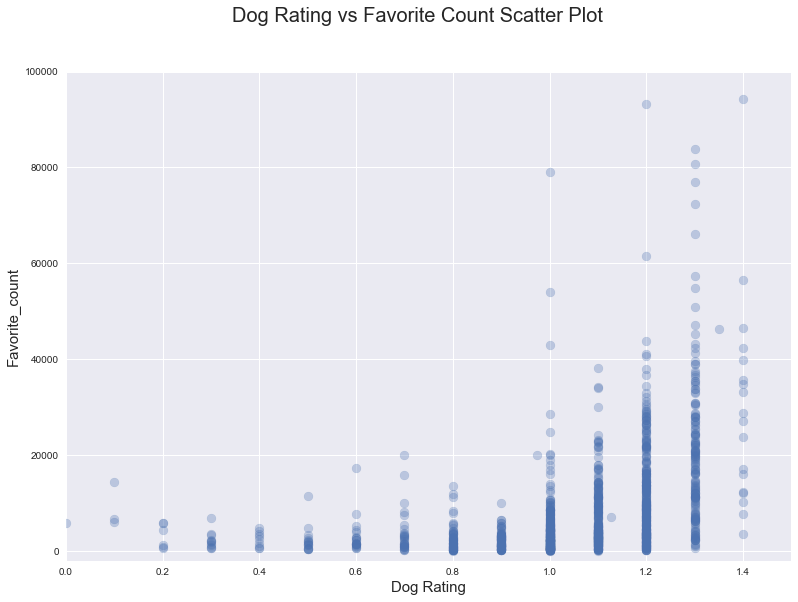

In [807]:
# plt.subplot()
plt.figure()
tweet_data.plot.scatter(x='rating', y='favorite_count', s= 80 ,alpha = .3, figsize = (13,9))
plt.suptitle('Dog Rating vs Favorite Count Scatter Plot', fontsize=20)
plt.ylabel('Favorite_count', fontsize = 15)
plt.xlabel('Dog Rating', fontsize = 15)
plt.xlim(0,1.5)
plt.ylim(-2000,100000)
plt.savefig('Dog Rating vs Favorite Count Scatter Plot')

plt.show()


# Clearly the higher the rating, the higher the favoriate count


In [808]:
tweet_data.groupby('stage')['tweet_id'].count()

stage
           1061
doggo      42  
floofer    4   
pupper     141 
puppo      15  
Name: tweet_id, dtype: int64

In [814]:
aggregation = {'tweet_id':'count','rating':'median', 'favorite_count':'median', 'retweet_count':'median'}

stage_summary = pd.DataFrame(tweet_data[tweet_data['stage']!= ''].groupby('stage').agg(aggregation).to_records())
stage_summary.columns = ['stage', 'count', 'median_rating','median_favoriate_count','median_retweet_count']
stage_summary


,stage,count,median_rating,median_favoriate_count,median_retweet_count
0,doggo,42,1.10,10125.5,2698.5
1,floofer,4,1.15,4958.0,1793.0
2,pupper,141,1.10,3297.0,1242.0
3,puppo,15,1.20,9972.0,2975.0


In [810]:
stage_summary.stage

0    doggo  
1    floofer
2    pupper 
3    puppo  
Name: stage, dtype: object

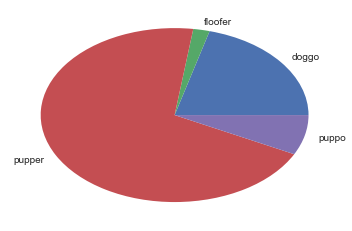

In [811]:
fig1, ax1 = plt.subplots()
ax1.pie(stage_summary['count'], labels = stage_summary['stage']) 
# fig1.show()
fig1.savefig('Stage Pie Plot')

# Pupper is the most populate stage

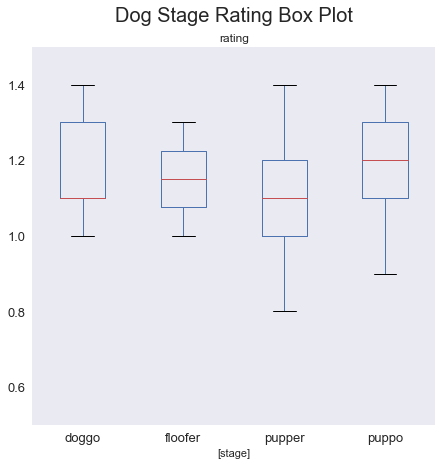

In [812]:
plt.figure()
tweet_data[tweet_data['stage']!= ''].boxplot(column= ['rating'], by= ['stage'], grid= False, fontsize = 13, figsize = (7,7))
plt.ylim(0.5,1.5)
plt.suptitle('Dog Stage Rating Box Plot', fontsize=20)
plt.savefig('Dog Stage Rating Box Plot')

plt.show()


#  Puppo dogs have the highest median ratings, and the second highest is the doggo stage dogs 

# Reference:
- Python Api Tutorial,Vik Paruchuri - https://www.dataquest.io/blog/python-api-tutorial/
- Json To Pandas Dataframe https://stackoverflow.com/questions/21104592/json-to-pandas-dataframe
- Python For Data Analysis Part 15: Working With Text Data, http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-15.html
- Summarising, Aggregating, and Grouping Data in Python Pandas, https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
- Visualization, https://pandas.pydata.org/pandas-docs/stable/visualization.html